#HACKHATHON 2022

##EXPLORE Data Science Academy Classification Hackathon

Overview
South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.
From South African Government.
With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

#STUDENT DETAIL
**Name**: **OGAGA OGHENEKOHWO**


**Importing packages**

In [4]:
!pip install wordcloud

In [45]:
#Importing WorCloud library
from wordcloud import WordCloud

In [46]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
import string

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.stem import PorterStemmer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [47]:
# Libraries for model building
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB

In [48]:
# Libraries for data preprocessing and model performance
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer, ENGLISH_STOP_WORDS
from sklearn.metrics import confusion_matrix, f1_score,classification_report, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import resample

In [16]:
import warnings
warnings.simplefilter("ignore")

## Loading data

In [49]:
# Let us import our test, train and submission data and analyze

train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
samplesubmission = pd.read_csv('sample_submission.csv')

print(train.shape)
print(test.shape)
print(samplesubmission.shape)

(33000, 2)
(5682, 2)
(2, 2)


In [7]:
train.head(3)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...


In [8]:
test.head(3)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.


In [9]:
samplesubmission.head()

,index,lang_id
0,1,tsn
1,2,nbl


## Exploratory Data Analysis

In [10]:
# Check for null values

train.isnull().any()
test.isnull().any()

index    False
text     False
dtype: bool

In [14]:
train["lang_id"].value_counts()

nso    3000
sot    3000
ssw    3000
tso    3000
ven    3000
afr    3000
zul    3000
nbl    3000
eng    3000
tsn    3000
xho    3000
Name: lang_id, dtype: int64

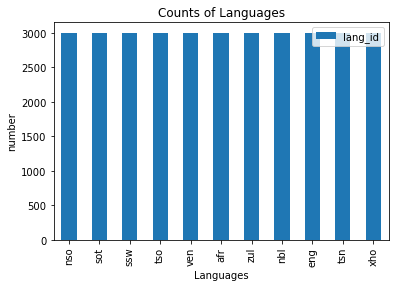

In [13]:
#Lets take a look at the breakdown of languages (target variable)

pd.value_counts(train['lang_id']).plot.bar()
plt.title('Counts of Languages')
plt.xlabel('Languages')
plt.ylabel('number')
plt.legend()
plt.show()

######  --Observations--

We can see from the graph above that all  languages are balanced and each language has a total of 3000 counts
This might have some impact in the model building

## Feature Engineering

In [56]:
#Importing label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y= train['lang_id']
y_trans = le.fit_transform(y)

We try to use label encoder to fit our target variable

In [17]:
X= train['text']

In [51]:
# creating a list for appending the preprocessed text
def processed_text(text):
    train_list = []
# iterating through all the text
    for i in text:
       # removing the symbols and numbers
        i = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', i)
        i = re.sub(r'[[]]', ' ', i)
        # converting the text to lower case
        i = i.lower()
        # appending to data_list
        train_list.append(i)
    data= "".join(train_list)
    return data

In [53]:
data = train['text'].apply(lambda x: processed_text(x))

In [54]:
data.head()

0    umgaqo-siseko we za amalu giselelo kumaziko ax...
1    i-dha iya kuba  obulumko bokubeka umsebe zi  a...
2    the provi ce of kwazulu- atal departme t of tr...
3    o  etefatša gore o ba file dilo ka moka tše le...
4    khomishi i ya  di ga yiso ya mbeu yo ewa maa a...
Name: text, dtype: object

In [55]:
#Using countVectorizer to change our strings to ints
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(data)
X.shape

(33000, 105196)

## Model Building

In [57]:
#Test_Train_Split
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.2)

### Model 1

In [58]:
#Using multinomial model
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [60]:
#Prdictor values for y
y_pred = model.predict(X_test)

In [61]:
#The accuracy score
ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy is :",ac)

Accuracy is : 0.9995454545454545


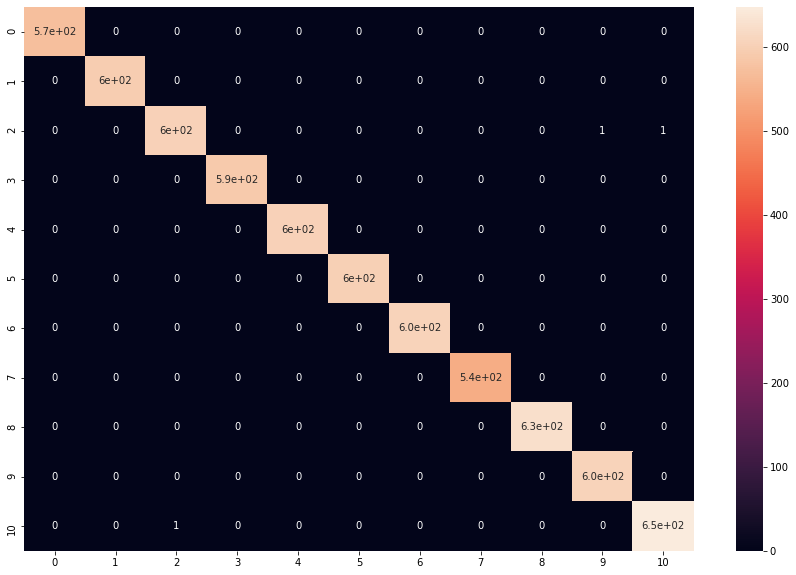

In [65]:
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot = True)
plt.show()

### Model 2

In [75]:
#Using the SVC Model
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred_2 = svc.predict(X_test)

print("The accuracy score of the SVC is:", accuracy_score(y_test, y_pred_2))
print("\n\nClassification Report:\n\n", classification_report(y_test, y_pred_2))

The accuracy score of the SVC is: 0.9962121212121212


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       573
           1       1.00      1.00      1.00       597
           2       0.99      0.99      0.99       606
           3       1.00      1.00      1.00       591
           4       1.00      1.00      1.00       604
           5       1.00      1.00      1.00       601
           6       1.00      1.00      1.00       605
           7       1.00      1.00      1.00       542
           8       1.00      1.00      1.00       627
           9       1.00      1.00      1.00       605
          10       0.98      0.99      0.99       649

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600



### Model 3

In [77]:
parameters = {'kernel':('linear', 'rbf'), 
              'C':(0.25,1.0),
              'gamma': (1,2)}

In [ ]:
svm = SVC()
clf = GridSearchCV(svm, parameters)
clf.fit(X_train,y_train)

In [ ]:
y_opt = clf.predict(X_test)
print("The accuracy for our tuned model is: ", accuracy_score(y_test, y_opt))

In [ ]:
clf.best_params_

### Model 4

In [81]:
# Training the logistic regression model on our rebalanced data
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [82]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [83]:
# Classification report
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_pred_test, target_names=type_labels))

NameError: name 'type_labels' is not defined

**kaggle submission**

#### Model 1 sample submission

In [62]:
test_data = test['text'].apply(lambda x: processed_text(x))

In [63]:
new_X = cv.transform(test_data)

In [64]:
pred = model.predict(new_X)
b = le.inverse_transform(pred)
sub_id = test['index'].to_list()
sub_pred = b.tolist()
list_of_tuples = list(zip(sub_id, sub_pred))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['index', 'lang_id'])
submission_df.set_index('index', inplace=True)

submission_df.to_csv('model.csv')

#### Model 2 sample submission

In [76]:
pred = svc.predict(new_X)
b = le.inverse_transform(pred)
sub_id = test['index'].to_list()
sub_pred = b.tolist()
list_of_tuples = list(zip(sub_id, sub_pred))
submission_df = pd.DataFrame(list_of_tuples,
                  columns = ['index', 'lang_id'])
submission_df.set_index('index', inplace=True)

submission_df.to_csv('model_2.csv')

#### Model 3 sample submission

#### Model 3 sample submission

## Model Summaries 

In [66]:
names = ['Logistic Regression', 'Nearest Neighbors', 
         'Linear SVM', 'RBF SVM',          
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [71]:
classifiers = [
    LogisticRegression(), 
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),    
    AdaBoostClassifier()
]